<a href="https://colab.research.google.com/github/cynthialmy/Sentiment-Analysis-with-Scikit-learn/blob/main/Hands_on_Sentiment_Analysis_with_Scikit_learn_NLTK_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Sentiment Analysis

Sentiment analysis is a technique used in natural language processing (NLP) to identify and extract subjective information from text, such as opinions, attitudes, emotions, and feelings. Yelp is a platform where users can post reviews about businesses, products, and services. Therefore, analyzing Yelp data can provide valuable insights into customers' sentiments towards a particular business or product.


## Objectives

1. Introduction to sentiment analysis
2. Collect and pre-process data from Yelp reviews of restaurants
3. Feature extraction
4. Train a machine learning model using scikit-learn to predict the review stars of restaurants
5. Identify the strengths and weaknesses of the machine learning model and suggest areas for improvement
6. Bonus: out-of-box techniques:
  - VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
  - Roberta Pretrained Model from HuggingFace🤗
  - HuggingFace Pipeline

In [11]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
# Using the Natural Language Processing (NLP) library, nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Sample of dataset

The data for this project will be collected from the Yelp API. The data will be pre-processed to remove any irrelevant information and to ensure that only the relevant information is used in the analysis.

All data set can be accessed and downloaded from Yelp Open Data Set [https://www.yelp.com/dataset/download].

In [12]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('https://raw.githubusercontent.com/cynthialmy/DataVizLab/main/yelp_dataset/yelp.csv')

In [13]:
# SHAPE OF THE DATASET

In [14]:
# COLUMN NAMES

In [15]:
# DATATYPE OF EACH COLUMN

In [16]:
# Take a look at the first few entries

In [17]:
# Summary of the dataset

# Preprocessing Yelp Data

Yelp data comes in unstructured format, so the first step is to preprocess the data. This includes cleaning the text, removing stop words, and tokenizing the words.

In [18]:
# CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW


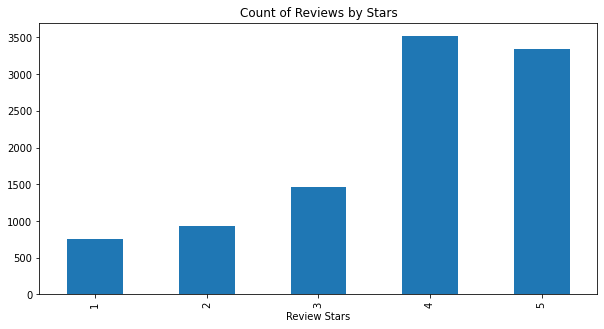

In [19]:
ax = data['stars'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [20]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50)

In [21]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW


In [22]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS


We can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  

We can say that the reviews marked cool tend to be short, not very useful to others and short.

Also, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    

Thus, we can say that longer reviews tend to be funny and useful.

In [23]:
# Classification in terms of negative (1 star), neutral (3 star), positive (5 star)


# Seperate the dataset into X and Y for prediction



# Basic NLTK

In [24]:
# print out an example of the review
example = data['text'][50]
print(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

In [25]:
# Tokenization is the process of breaking up a text into smaller units called tokens, 
# which could be words, punctuation marks, or any other meaningful unit.


In [26]:
# POS tagging
# The function returns a new list of tuples


In [27]:
# Perform the named entity recognition. 
# The function returns a new tree-like object where named entities are represented as subtrees.


In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION

In [30]:
# CONVERTING THE WORDS INTO A VECTOR

In [31]:
#     The data that we can see is the transformed words.
#     If we now get the feature's name - we can get the word back

In [32]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

NameError: ignored

In [ ]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET

# Building a Sentiment Classifier

In this step, you will train a machine learning model to classify Yelp reviews into positive, negative, or neutral sentiments. You can use a variety of models, such as Naive Bayes, Support Vector Machines (SVMs), or Recurrent Neural Networks (RNNs).

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
score_mnb = round(accuracy_score(y_test,predmnb)*100,2)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",score_mnb)
print("Classification Report:")
print(classification_report(y_test,predmnb))

In [ ]:
# Random Forest

In [ ]:
# Decision Tree

In [ ]:
# Support Vector Machine

In [ ]:
# K Nearest Neighbour Algorithm

In [ ]:
print('Multinomial Naive Bayes = ',score_mnb,'%') 
print('Support Vector Machine = ',score_svm,'%') 
print('Random Forest Classifier = ',score_rmfr,'%') 
print('Decision Tree = ',score_dt,'%') 
print('K Neighbor Classifier = ',score_knn,'%') 

In [ ]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating:")
print(data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

In [ ]:
# AVERAGE REVIEW
ar = data['text'][16]


In [ ]:
# NEGATIVE REVIEW
nr = data['text'][23]


## Bias in dataset
In the data count below, we can see that predictions are biased towards positive reviews. It is possible that the dataset has more positive reviews as compared to negative reviews.
This can likely be fixed by normalizing the dataset to have equal number of reviews - thereby removing the bias.

In [ ]:
count = data['stars'].value_counts()
print(count)

# Bonus - using out-of-box techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [ ]:
nltk.download('all')

# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
# something positive
sia.polarity_scores('I am so happy!')

In [ ]:
# something negative

In [ ]:
# example

In [ ]:
# Run the polarity score on the entire dataset
res = {}


In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'business_id'})
vaders = vaders.merge(data, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

## Plot VADER results

In [ ]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Yelp Star Review')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example


In [ ]:
data = data.head(500)

In [ ]:
# Run for Roberta Model
# using a pre-trained RoBERTa model to classify the sentiment of a text


In [ ]:
# This is a Python function called polarity_scores_roberta that takes
# a string of text as input and returns a dictionary of sentiment scores for that text


In [ ]:
# iterates over a pandas DataFrame called data, 
# which presumably contains columns for text and business IDs.


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'business_id'})
results_df = results_df.merge(data, how='left')

# Step 3. Compare Scores between models

In [ ]:
# take a look at the column of the df
results_df.columns

In [ ]:
# The pair plot is a matrix of scatter plots and histograms, where each variable 
# in the DataFrame is plotted against every other variable. 
# The purpose of the plot is to visualize the relationship 
# between different sentiment scores generated by Vader and RoBERTa models.


# Step 4: Review Examples

## Positive sentiment 1-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
# retrieves the text of the row with the highest positive sentiment score 
# using the RoBERTa model among the rows that have a star rating of 1.

In [ ]:
# retrieves the text of the row with the highest positive sentiment score 
# using the Vader model among the rows that have a star rating of 1.

## Negative sentiment 5-Star Reviews

In [ ]:
# retrieves the text of the row with the highest negative sentiment score 
# using the RoBERTa model among the rows that have a star rating of 5.

In [ ]:
# retrieves the text of the row with the highest negative sentiment score 
# using the Vader model among the rows that have a star rating of 5.

# Extra: The Transformers Pipeline
Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline
# creates a sentiment analysis pipeline using the Hugging Face Transformers library. 
# The pipeline() function is used to create a pre-trained sentiment analysis model 
# that can be used to classify the sentiment of input text.


In [ ]:
# something positive
sent_pipeline('I love sentiment analysis!')

In [ ]:
# something negative

# The End